# Graph Vis

## networkx

### Init

In [ ]:
"""
jupyter nbconvert --to markdown testing.ipynb --output README.md
[base)conda install networkx pygraphviz
for tree drawing:
[base)conda install -c conda-forge pygraphviz
"""

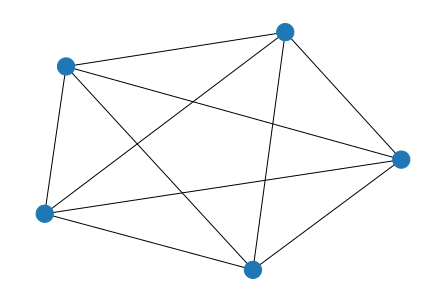

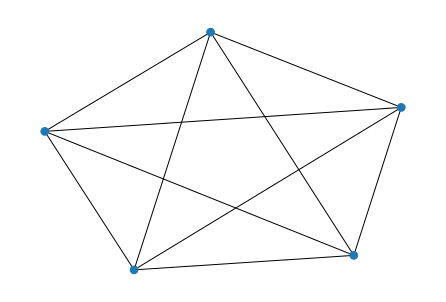

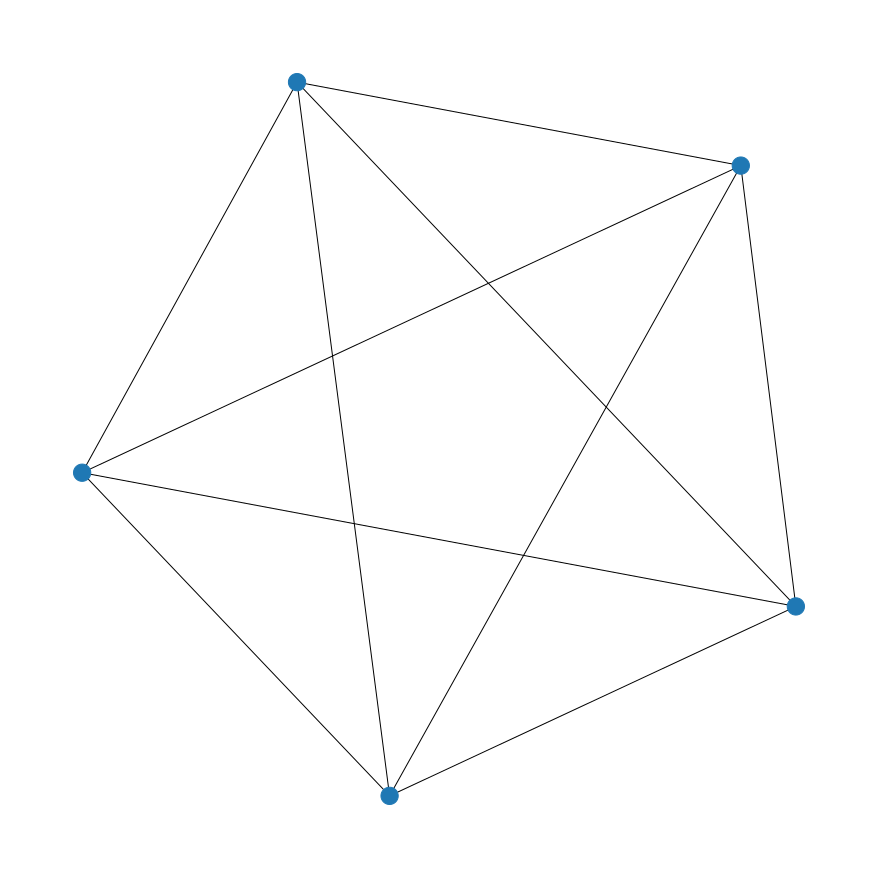

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

G = nx.complete_graph(5)

# default
plt.figure(1)
nx.draw(G)

# smaller nodes
plt.figure(2)
nx.draw(G, node_size=60)

# larger figure size
plt.figure(3, figsize=(12, 12))
# !plt.figure(figsize=(width, height))-> by default the figure has the dimensions as (6.4, 4.8).
# !Normally each unit inch is of 80 x 80 pixels = 512 x 384 pixels.
nx.draw(G)
plt.show()

# save as pdf
# import matplotlib
# matplotlib.use('PDF')
# plt.savefig("path_graph.pdf")


### Basics

#### Graph Types

- `Graph` : Undirected simple (allows self loops)
- `DiGraph` : Directed simple (allows self loops)
- `MultiGraph` : Undirected with parallel edges
- `MultiDiGraph` : Directed with parallel edges
  
- can convert to undirected: `g.to_undirected()`
- can convert to directed: `g.to_directed()`

To construct, use standard python syntax:

```python
>>> g = nx. Graph ()
>>> d = nx. DiGraph ()
>>> m = nx. MultiGraph ()
>>> h = nx. MultiDiGraph ()
```

#### ❌Adding Nodes

`add_nodes_from() `takes any iterable collection and any
object

In [2]:
g = nx.Graph()
g.add_node ('a')
print(g.nodes())
g.add_nodes_from(['b','c','d'])
print(g.nodes())
g.add_nodes_from('xyz')
print(g.nodes())
h= nx.path_graph(5)
g.add_nodes_from(h)
print(g.nodes())


['a']
['a', 'b', 'c', 'd']
['a', 'b', 'c', 'd', 'x', 'y', 'z']
['a', 'b', 'c', 'd', 'x', 'y', 'z', 0, 1, 2, 3, 4]


#### ✔️Adding Edges

- **Adding an edge between nodes that don't exist will automatically add those nodes**
- `add_nodes_from()` takes any iterable collection and any type (anything that has a iter() method)

['a', 'b', 'c', 'd']
[('a', 'b'), ('b', 'c'), ('c', 'a'), ('d', 'c'), ('d', 'b')]


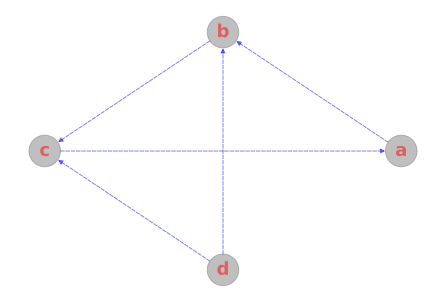

In [4]:
# v1:
g = nx.DiGraph([('a','b'),('b','c'),('c','a')] )
# v2:
g.add_edges_from([['d', 'c'], ['d', 'b']])
print(g.nodes())
print(g.edges())
# nx.draw(g)
nx.draw(g, with_labels=True, font_weight='bold', node_size=1000, node_color='gray', node_shape='o', alpha=0.5, font_size=18, font_color='red', width=1, edge_color='blue', style='dashed', label='Graph', pos=nx.circular_layout(g))

#### Adding Node and Edge attributes

##### Node attributes

Can add node attributes as optional arguments along with most add methods

In [5]:
G=nx.Graph()
G.add_edge(1,2)
G.nodes[1]['name'] = 'Jhon'
G.nodes[1]['age'] = 30
G.nodes[1]

{'name': 'Jhon', 'age': 30}

##### Edge attributes

Can add edge attributes as optional arguments along with most add methods

In [6]:
g = nx.Graph()
g.add_edge(1, 2, w =4.7 )
print(g.edges())
print(g.edges(data=True))
g.add_edges_from([(3 ,4),(4,5)], w =3.0)
print(g.edges(data=True))
g.add_edges_from([(1 ,2,{'val':2.0}) ])
print(g.edges(data=True))
# adds third value in tuple as `weight ' attr
g.add_weighted_edges_from([(6 ,7 ,3.0)])
print(g.edges(data=True))
print(g.get_edge_data(3,4))
g.add_edge(5,6)
g[5][6]

[(1, 2)]
[(1, 2, {'w': 4.7})]
[(1, 2, {'w': 4.7}), (3, 4, {'w': 3.0}), (4, 5, {'w': 3.0})]
[(1, 2, {'w': 4.7, 'val': 2.0}), (3, 4, {'w': 3.0}), (4, 5, {'w': 3.0})]
[(1, 2, {'w': 4.7, 'val': 2.0}), (3, 4, {'w': 3.0}), (4, 5, {'w': 3.0}), (6, 7, {'weight': 3.0})]
{'w': 3.0}


{}

#### Removing Nodes and Edges

In [ ]:
# remove edge
g = nx.Graph([(1,2),(2,3),(3,4)])
g.remove_edge(1,2)
print(g.edges())

# remove node
g = nx.Graph([(1,2),(2,3),(3,4)])
g.remove_node(2)
print(g.edges())


#### Simple Properties

In [7]:
g = nx.Graph([(1,2),(2,3),(3,4)])
# Number of nodes :
print(g.number_of_nodes())	
# Number of edges :
print(g.number_of_edges())
# Check node membership
print(1 in g)
print(g.has_node(1))
print(g.has_node(5))
# Check edge membership
print(g.has_edge(1,2))
print(g.has_edge(5,6))

4
3
True
True
False
True
False


#### Neighbors

- Iterating over edges
- can be useful for efficiency

[0, 2]
[0, 1, 3]
[2, 0]


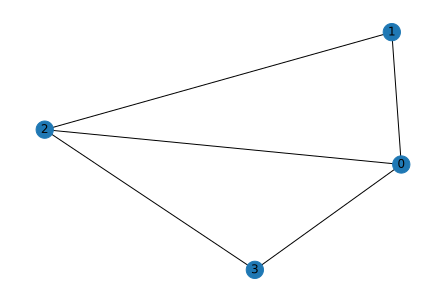

In [8]:
g=nx.gnm_random_graph(4,5)
print(list(g.neighbors(1)))
print(list(g.neighbors(2)))
print(list(g.neighbors(3)))
nx.draw(g, with_labels=True)

#### Generating Graphs

In the examples above, we manually constructed network models by adding or removing nodes and edges. But NetworkX also has some built-in functions that can generate networks of speciﬁc shapes more easily. Here are a few examples:

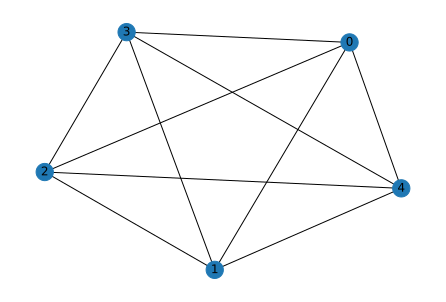

In [9]:
# complete graph
g = nx.complete_graph(5)
nx.draw(g, with_labels=True)

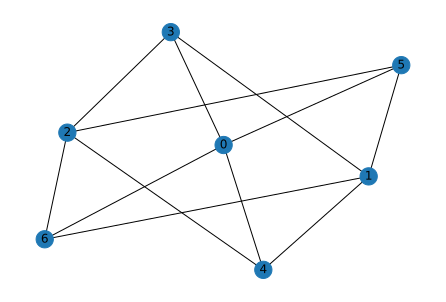

In [10]:
# bipartite graph
g = nx.complete_bipartite_graph(3,4)
nx.draw(g, with_labels=True)

### Draw Pro

You can use `draw_networkx_edge_labels(edge_labels)` to draw label between edges.

- If `edge_labels` is not given, the attributes of edge is used.
- `edge_labels` should be a dictionary keyed by edge two-tuple of text labels. Only labels for the keys in the dictionary are drawn.

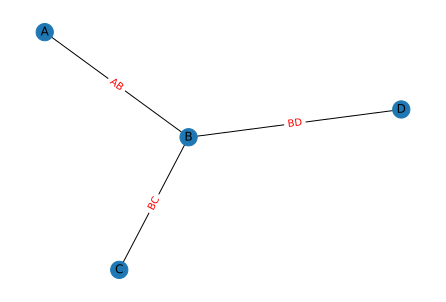

In [11]:
G = nx.Graph()
G.add_edges_from( [['A', 'B'], ['B', 'C'], ['B', 'D']])
# pos is mandatory for drawing labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={('A', 'B'): 'AB', 
                 ('B', 'C'): 'BC', 
                 ('B', 'D'): 'BD'},
    font_color='red'
)
plt.axis('off')
plt.show()

#### label with weight from  `get_edge_attributes()`

{(1, 2): 0.5, (1, 3): 0.75, (2, 4): 1.2, (3, 4): 0.3}


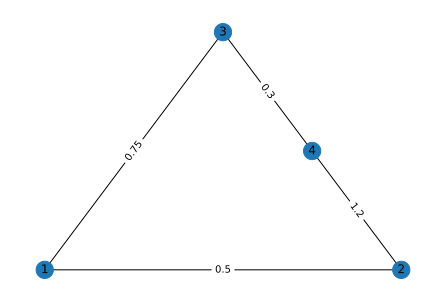

In [12]:
# with weights
g = nx.Graph()
g.add_weighted_edges_from([(1,2,0.5),(1,3,0.75),(2,4,1.2),(3,4,0.3)])
label_weight=nx.get_edge_attributes(g,'weight')
print(label_weight)
# pos is mandatory for drawing labels
pos=nx.planar_layout(g)
nx.draw(g, pos=pos,with_labels=True)
nx.draw_networkx_edge_labels(g,pos=pos,edge_labels=label_weight)
plt.show()

#### custom labels using : `G.edges(data=True)`

{(1, 2): Text(-0.33268978594649834, 0.5000000000000003, 'cost: 10'),
 (1, 3): Text(0.08346779111330338, -0.1865649740257741, 'cost: 10'),
 (2, 3): Text(0.249221994833195, -0.31343502597422557, 'cost: 30')}

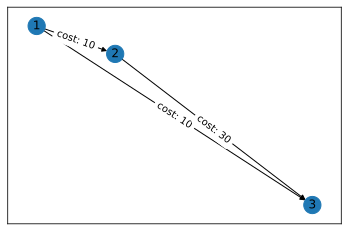

In [13]:
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2,10), (1, 3,10), (2, 3,30)])
pos = nx.spring_layout(G)

edge_labels = dict([((n1, n2), f'cost: {d["weight"]}')
                        for n1, n2, d in G.edges(data=True)])

nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


### Draw Tree

`(base)conda install -c conda-forge pygraphviz`


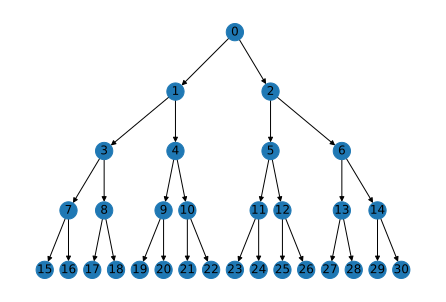

In [14]:
from networkx.drawing.nx_agraph import graphviz_layout
btree = nx.balanced_tree(2,4)
pos=graphviz_layout(btree,prog='dot')
nx.draw(btree,pos,with_labels=True,arrows=True)

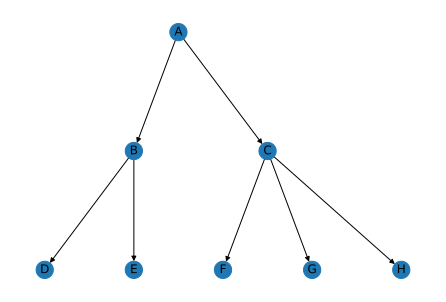

In [15]:
g = nx.DiGraph()
g.add_nodes_from(["A","B","C","D","E","F","G","H"])
g.add_edges_from([
	("A","B"),
	("A","C"),
	("B","D"),
	("B","E"),
	("C","F"),
	("C","G"),
	("C","H")])
pos=graphviz_layout(g, prog='dot')
# pos=graphviz_layout(g, prog='dot',root='A')

nx.draw(g,pos,with_labels=True)

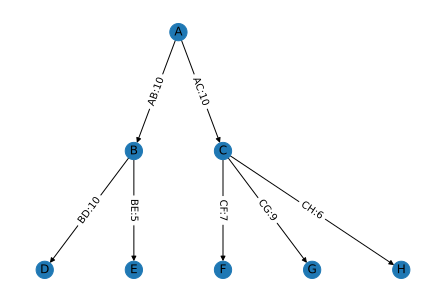

In [24]:
g = nx.DiGraph()
g.add_weighted_edges_from([
	("A","B",10),
	("A","C",10),
	("B","D",10),
	("B","E",5),
	("C","F",7),
	("C","G",9),
	("C","H",6)])


edge_labels = dict([((u,v),f'{u}{v}:{e["weight"]}') for u,v,e in g.edges(data=True)])
pos=graphviz_layout(g, prog='dot',root='A')
nx.draw(g,pos,with_labels=True)
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
plt.show()


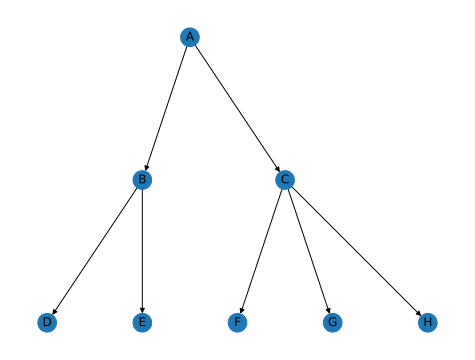

In [16]:
from networkx.drawing.nx_agraph import graphviz_layout


def drawTree(edges, with_labels=True, node_size=350, fig_size=(6.4, 4.8), width=1):
	g = nx.DiGraph(edges)
	pos = graphviz_layout(g, prog='dot')
	# pos=graphviz_layout(g, prog='dot',root='A')
	plt.figure(1, figsize=fig_size)
	nx.draw(g, pos, with_labels=with_labels, node_size=node_size, width=width)
	plt.show()


edges = [
    ("A", "B"),
    ("A", "C"),
    ("B", "D"),
    ("B", "E"),
    ("C", "F"),
    ("C", "G"),
    ("C", "H")]

drawTree(edges)


In [13]:
import pandas as pd
g = pd.read_csv('graph.csv')
g.head()


,id,parent_id,name
0,0,-1,A
1,1,0,B
2,2,0,C
3,3,1,D
4,4,1,E


In [18]:
edges = [(pid, id) for id, pid in g[['id', 'parent_id']].values]
edges


[(-1, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 6),
 (2, 7),
 (3, 8),
 (3, 9),
 (4, 10),
 (4, 11)]

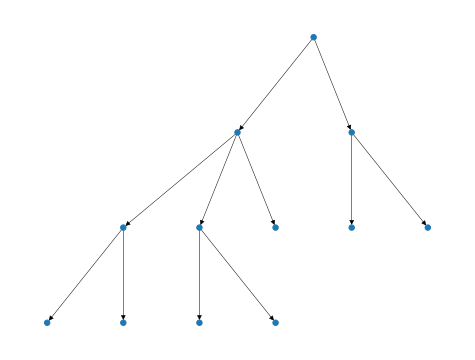

In [19]:
drawTree(edges[1:], with_labels=False, node_size=30, width=.5)


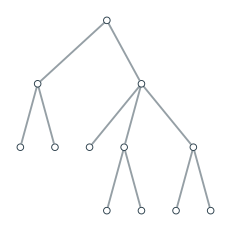

In [20]:
from netgraph import Graph
Graph(edges[1:], node_layout='dot',node_width=.5,node_size=2)
plt.show()


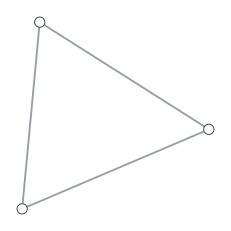

In [56]:
import matplotlib.pyplot as plt
plt.ion()
from netgraph import Graph

fig, ax = plt.subplots()
g = Graph([(0, 1), (1, 2), (2, 0)], ax=ax)
plt.show()

# make some changes
g.node_artists[0].set_alpha(0.2)
g.edge_artists[(1, 2)].set_facecolor('red')

# force redraw to display changes
fig.canvas.draw()


### Test

In [17]:
g = nx.DiGraph()
similarity = {"AB":0.6,"AC":0.7,"BD":0.7,"BE":0.6,"CF":0.7,"CG":0.9,"CH":0.8}
g.add_weighted_edges_from([
	("A","B",round((1 - similarity["AB"]),1)),
	("A","C",round((1 - similarity["AC"]),1)),
	("B","D",round((1 - similarity["BD"]),1)),
	("B","E",round((1 - similarity["BE"]),1)),
	("C","F",round((1 - similarity["CF"]),1)),
	("C","G",round((1 - similarity["CG"]),1)),
	("C","H",round((1 - similarity["CH"]),1))])
	
edge_labels = {}
for i,(u,v,c) in enumerate(g.edges(data=True)):
	# print(i,u,v,c)
	sim_uv = "".join([u,v])
	sim_uv_score = similarity[sim_uv]
	dis_uv_score = round((1- sim_uv_score),1)
	# label = " ".join(["s: ", str(sim_uv_score)," ","d: ",str(dis_uv_score)])
	label = f's:{sim_uv_score}, d:{dis_uv_score}'
	edge_labels[(u,v)] = label
	
	
# print(edge_labels)


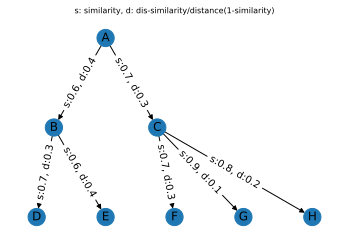

In [18]:
from networkx.drawing.nx_agraph import graphviz_layout
pos=graphviz_layout(g, prog='dot')
# labels = nx.get_edge_attributes(g,'weight')
# print(labels)
plt.title('s: similarity, d: dis-similarity/distance(1-similarity)',fontsize=8)
nx.draw(g,pos,with_labels=True)
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
plt.show()

In [7]:
nx.closeness_centrality(g,distance='weight')

{'A': 0.0,
 'B': 0.3571428571428571,
 'C': 0.47619047619047616,
 'D': 0.5714285714285714,
 'E': 0.4761904761904761,
 'F': 0.6349206349206349,
 'G': 1.1428571428571428,
 'H': 0.8163265306122449}

In [8]:
nx.betweenness_centrality(g)
# nx.betweenness_centrality(g,weight='weight')

{'A': 0.0,
 'B': 0.047619047619047616,
 'C': 0.07142857142857142,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0}

In [9]:
nx.degree_centrality(g)

{'A': 0.2857142857142857,
 'B': 0.42857142857142855,
 'C': 0.5714285714285714,
 'D': 0.14285714285714285,
 'E': 0.14285714285714285,
 'F': 0.14285714285714285,
 'G': 0.14285714285714285,
 'H': 0.14285714285714285}

In [10]:
dictionary_items  = nx.harmonic_centrality(g,distance='weight').items()
sorted(dictionary_items )

[('A', 0),
 ('B', 2.5),
 ('C', 3.3333333333333335),
 ('D', 4.761904761904762),
 ('E', 3.75),
 ('F', 5.0),
 ('G', 12.5),
 ('H', 7.0)]

### Resources:

- [Book: Introduction to the Modeling and Analysis of Complex Systems[Chapter 15 ->]](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama))

## netgraph

In [31]:
# !pip install netgraph

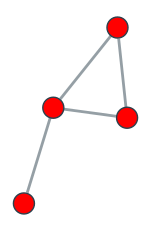

In [2]:
import matplotlib.pyplot as plt
from netgraph import Graph

edges = [(0, 1), (1, 2),[2,0],[1,3]]
Graph(edges, node_color='red', node_size=4.)
plt.show()


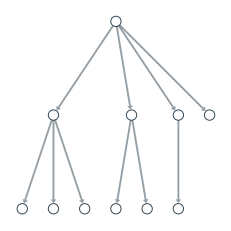

In [2]:
import matplotlib.pyplot as plt

from netgraph import Graph

unbalanced_tree = [
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (2, 6),
    (3, 7),
    (3, 8),
    (4, 9),
    (4, 10),
    (4, 11),
]

Graph(unbalanced_tree, node_layout='dot',arrows=True)

plt.show()


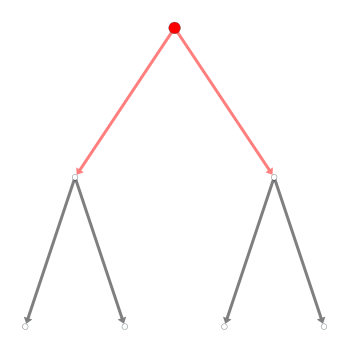

In [13]:
from netgraph import Graph

# e = [
#     ("A", "B"),
#     ("A", "C"),
#     ("B", "D"),
#     ("B", "E"),
#     ("C", "F"),
#     ("C", "G"),
#     ("C", "H")]
e = [
    ["A", "B"],
    ["A", "C"],
    ["B", "D"],
    ["B", "E"],
    ["C", "F"],
    ["C", "G"],
    ["C", "H"]]


def get_nedges_with_attributes(e, n, root, node_size):
	All = []
	e = e[:n]
	for l in e:
		All.extend(l)  # EXTEND!!! (not append)
	All = list(set(All))
	node_color = dict()
	for n in All:
		if n == root:
			node_color[n] = 'red'
		else:
			node_color[n] = 'w'
	node_edge_color = dict()
	
	
	for n in All:
		if n == root:
			node_edge_color[n] = 'red'
		else:
			node_edge_color[n] = 'black'

	node_size_dict = dict()
	for n in All:
		if n == root:
			node_size_dict[n] = node_size * 2
		else:
			node_size_dict[n] = node_size
			
	edges_color = dict()
	for i in e:
		if i[0] == root:
			edges_color[(i[0], i[1])] = 'red'
		else:
			edges_color[(i[0], i[1])] = 'black'

	return [e, node_color, node_edge_color, node_size_dict, edges_color]


r = get_nedges_with_attributes(
	e=e, n=6, root="A", node_size=1)


fig, ax = plt.subplots(figsize=(6, 8))
Graph(r[0], node_size=r[3], node_color=r[1], node_edge_width=.1,
      edge_width=1, ax=ax, node_layout='dot', arrows=True, prettify=True,edge_color=r[4])
plt.show()
